In [1]:
import os
import pandas as pd
import numpy as np
import glob

In [2]:
os.chdir('/fs/scratch/PAS0439/02.virome_lzj/01.abundance')

In [3]:
files = glob.glob('*.stat')

In [4]:
mapping_dict = {}
for f in files:
    sample = f.split('.stat')[0]
    with open(f, 'r') as file:
        _ = file.readline().split()
        if len(_) < 3:
        
            mapping_rate = int(_[0])/int(_[1])*100
            mapping_dict[sample] = mapping_rate
        else:
            apping_rate = int(_[1])/int(_[2])*100
            mapping_dict[sample] = mapping_rate
    

In [5]:
table = pd.DataFrame.from_dict(mapping_dict, orient = 'index').reset_index()

In [6]:
table.rename(columns={'index':'sample', 0:'mapping_rate'}, inplace = True)

In [7]:
metadata = pd.read_csv('/fs/scratch/PAS0439/metadata.csv').drop('file_path', axis=1)

In [8]:
data = pd.merge(table, metadata, left_on='sample', right_on='id')

In [9]:
species = list(data.groupby('species')['sample'].count().reset_index().query('sample > 15')['species'])
data_for_plot = data[data.species.isin(species)]

In [10]:
data_for_plot.groupby('species')['species'].count()

species
Bos_grunniens     16
Bos_indicus       23
Bos_taurus       729
Capra_hircus      82
Ovis_aries        82
Name: species, dtype: int64

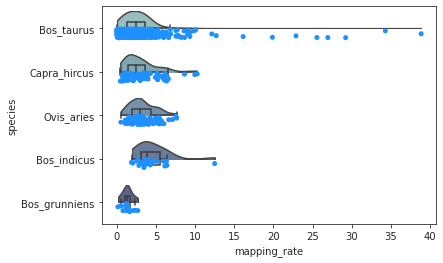

In [11]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np


#sns.set_style('white')
sns.set_style('ticks')

palette = sns.cubehelix_palette(start=.5, rot=-.5, dark=0.3, light=0.7)
ax = sns.violinplot(y="species", x="mapping_rate", data=data_for_plot,
                    palette=palette,
                    scale="width", inner=None, cut=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="species", x="mapping_rate", data=data_for_plot, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="species", x="mapping_rate", data=data_for_plot, color='dodgerblue', ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
#ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
rcParams['figure.figsize'] = 3, 2.5
#plt.savefig('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology/species_mapping.svg', facecolor = 'w', edgecolor = 'w')
plt.show()

In [12]:
sara_dairy = data_for_plot.query('beef_or_dairy == "dairy"')

In [13]:
sara_dairy.loc[sara_dairy.query('project == "PRJEB34231"').index, 'SARA'] = 'SARA'

/tmp/slurmtmp.12889627/ipykernel_118120/2525633689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sara_dairy.loc[sara_dairy.query('project == "PRJEB34231"').index, 'SARA'] = 'SARA'


In [14]:
sara_dairy.loc[sara_dairy.query('project != "PRJEB34231"').index, 'SARA'] = 'No'

In [15]:
sara_dairy

,sample,mapping_rate,id,species,beef_or_dairy,grazing_or_not,collection_method,geography,project,SARA
0,SRR11699213,2.858051,SRR11699213,Bos_taurus,dairy,no,na,USA,PRJNA630534,No
6,ERR3515509,12.134439,ERR3515509,Bos_taurus,dairy,no,cannulate,Canada,PRJEB34231,SARA
9,G2005058,0.114864,G2005058,Bos_taurus,dairy,yes,slau,China,PRJEB23561,No
13,SRR11699214,2.004504,SRR11699214,Bos_taurus,dairy,no,na,USA,PRJNA630534,No
25,SRR12021133,2.893587,SRR12021133,Bos_taurus,dairy,no,cannulate,China,PRJNA639405,No
...,...,...,...,...,...,...,...,...,...,...
939,SRR10765508,2.799650,SRR10765508,Bos_taurus,dairy,no,cannulate,China,PRJNA597489,No
944,SRR10765518,0.807394,SRR10765518,Bos_taurus,dairy,no,cannulate,China,PRJNA597489,No
946,ERR3801472,0.813965,ERR3801472,Bos_taurus,dairy,no,tube,UK,PRJEB33080,No
971,SRR8698426,0.542659,SRR8698426,Bos_taurus,dairy,no,cannulate,China,PRJNA526070,No


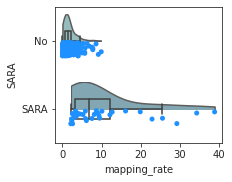

In [16]:
#sns.set_style('white')
sns.set_style('ticks')
palette = sns.cubehelix_palette(start=.5, rot=-.5, dark=0.3, light=0.7)
ax = sns.violinplot(y="SARA", x="mapping_rate", data=sara_dairy,
                    palette=palette,
                    scale="width", inner=None, cut=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="SARA", x="mapping_rate", data=sara_dairy, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="SARA", x="mapping_rate", data=sara_dairy, color='dodgerblue', ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
#ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
rcParams['figure.figsize'] = 3, 2.5
#plt.savefig('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology/SARA_dairy.svg', facecolor = 'w', edgecolor = 'w')
plt.show()

In [17]:
sara_goat = data_for_plot.query('project == "PRJNA552122"')

In [18]:
sara = ['SRR9651404', 'SRR9651405', 'SRR9651406', 'SRR9651407', 'SRR9651408', 'SRR9651409', 'SRR9651418', 'SRR9651419']
no = ['SRR9651410', 'SRR9651411', 'SRR9651412', 'SRR9651413', 'SRR9651414', 'SRR9651415', 'SRR9651416', 'SRR9651417']

In [19]:
sara_goat.loc[sara_goat[sara_goat['sample'].isin(sara)].index, 'SARA'] = 'SARA'
sara_goat.loc[sara_goat[sara_goat['sample'].isin(no)].index, 'SARA'] = 'No'

/tmp/slurmtmp.12889627/ipykernel_118120/2059805034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sara_goat.loc[sara_goat[sara_goat['sample'].isin(sara)].index, 'SARA'] = 'SARA'


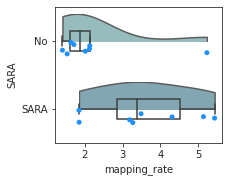

In [20]:
#sns.set_style('white')
sns.set_style('ticks')
palette = sns.cubehelix_palette(start=.5, rot=-.5, dark=0.3, light=0.7)
ax = sns.violinplot(y="SARA", x="mapping_rate", data=sara_goat,
                    palette=palette,
                    scale="width", inner=None, cut=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="SARA", x="mapping_rate", data=sara_goat, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="SARA", x="mapping_rate", data=sara_goat, color='dodgerblue', ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
#ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
rcParams['figure.figsize'] = 3, 2.5
#plt.savefig('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology/SARA_goat.svg', facecolor = 'w', edgecolor = 'w')

plt.show()

In [21]:
imgvr = pd.read_csv('/fs/scratch/PAS0439/imgvr_virus_mapping.tsv', sep = '\t')
imgvr

,id,imgvr
0,ERR3275100,0.22
1,ERR3275101,0.55
2,ERR3275102,0.40
3,ERR3220205,0.18
4,ERR3220206,0.19
...,...,...
235,ERR3220215,0.11
236,ERR3220216,0.29
237,ERR3211451,0.07
238,ERR3211452,0.13


In [22]:
data

,sample,mapping_rate,id,species,beef_or_dairy,grazing_or_not,collection_method,geography,project
0,SRR11699213,2.858051,SRR11699213,Bos_taurus,dairy,no,na,USA,PRJNA630534
1,ERR2027899,4.327322,ERR2027899,Bos_taurus,beef,no,slau,UK,PRJEB21624
2,ERR3275123,1.441883,ERR3275123,Bos_taurus,beef,no,slau,UK,PRJEB31266
3,SRR7907949,3.488206,SRR7907949,Capra_hircus,na,no,slau,China,PRJNA492173
4,GSG1,2.951313,GSG1,Capra_hircus,na,no,na,China,PRJNA474564
...,...,...,...,...,...,...,...,...,...
970,ERR3220186,2.948709,ERR3220186,Bos_taurus,beef,no,slau,UK,PRJEB31266
971,SRR8698426,0.542659,SRR8698426,Bos_taurus,dairy,no,cannulate,China,PRJNA526070
972,ERR3275112,4.095525,ERR3275112,Bos_taurus,beef,no,slau,UK,PRJEB31266
973,ERR3275108,4.142849,ERR3275108,Bos_taurus,beef,no,slau,UK,PRJEB31266


In [23]:
mapping_comparison_pre = pd.merge(data, imgvr, left_on='sample', right_on= 'id')

In [24]:
mapping_comparison_ASS = mapping_comparison_pre.query('project == "PRJEB31266"')

In [25]:
mapping_comparison = pd.melt(mapping_comparison_ASS, id_vars='sample', value_vars=['mapping_rate', 'imgvr'])

In [26]:
mapping_comparison

,sample,variable,value
0,ERR3275123,mapping_rate,1.441883
1,ERR3201416,mapping_rate,1.620299
2,ERR3201389,mapping_rate,1.208674
3,ERR3211476,mapping_rate,3.027575
4,ERR3224567,mapping_rate,3.301216
...,...,...,...
475,ERR3275122,imgvr,0.160000
476,ERR3275097,imgvr,0.550000
477,ERR3220186,imgvr,0.290000
478,ERR3275112,imgvr,0.520000


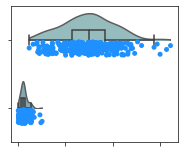

In [27]:
#sns.set_style('white')
sns.set_style('ticks')
palette = sns.cubehelix_palette(start=.5, rot=-.5, dark=0.3, light=0.7)
ax = sns.violinplot(y="variable", x="value", data=mapping_comparison,
                    palette=palette,
                    scale="width", inner=None, cut=0)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))

sns.boxplot(y="variable", x="value", data=mapping_comparison, saturation=1, showfliers=False,
            width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(y="variable", x="value", data=mapping_comparison, color='dodgerblue', ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.12]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set(xlabel='', ylabel='', yticklabels='', xticklabels='')
rcParams['figure.figsize'] = 3, 2.5
plt.savefig('/fs/ess/PAS0439/MING/virome/checkv_trimmed_for_dowmstream/ecology/mapping_imgvr.svg', facecolor = 'w', edgecolor = 'w')

plt.show()

In [44]:
rvd = list(mapping_comparison.query('variable == "mapping_rate"')['value'])

In [45]:
sum(rvd)/len(rvd)

2.972577639325429